In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('walmart.xlsx')
df = data[['Order Date','Sales']]

In [5]:
df

,Order Date,Sales
0,2012-01-01,180.36
1,2012-01-01,872.48
2,2012-01-02,1239.06
3,2012-01-02,614.80
4,2012-01-02,4083.19
...,...,...
8394,2015-12-30,448.10
8395,2015-12-30,257.46
8396,2015-12-30,14.15
8397,2015-12-30,803.33


In [6]:
df.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [7]:
df_prophet = df[['Order Date','Sales']].copy()
df_prophet.rename(columns={'Order Date':'ds','Sales':'y'}, inplace=True)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

In [8]:
df_prophet

,ds,y
0,2012-01-01,180.36
1,2012-01-01,872.48
2,2012-01-02,1239.06
3,2012-01-02,614.80
4,2012-01-02,4083.19
...,...,...
8394,2015-12-30,448.10
8395,2015-12-30,257.46
8396,2015-12-30,14.15
8397,2015-12-30,803.33


In [16]:
df_weekly = df_prophet.resample('W-MON', on='ds').sum().reset_index()
df_weekly.head()

,ds,y
0,2012-01-02,12154.7100
1,2012-01-09,184082.3865
2,2012-01-16,104938.8405
3,2012-01-23,117531.9835
4,2012-01-30,78733.4990


## Train-Test Split

In [11]:
split_point = int(len(df_weekly)*0.8)    #80% for training & 20% for testing

train_data = df_weekly.iloc[:split_point]
test_data = df_weekly.iloc[split_point:]

In [12]:
train_date_range = (train_data['ds'].min(), train_data['ds'].max())
test_date_range = (test_data['ds'].min(), test_data['ds'].max())

In [13]:
train_date_range, test_date_range

((Timestamp('2012-01-02 00:00:00'), Timestamp('2015-03-16 00:00:00')),
 (Timestamp('2015-03-23 00:00:00'), Timestamp('2016-01-04 00:00:00')))

## Modelling

In [14]:
model = Prophet()                     # Initialize model
model.fit(train_data)                 # Fit model on train data

future = model.make_future_dataframe(periods=12, freq='W-MON')   # new dataframe for future predictions
forecast = model.predict(future)                                 # Generate forecasts
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()         # display forecasted data

23:52:09 - cmdstanpy - INFO - Chain [1] start processing
23:52:11 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
175,2015-05-11,53422.667129,18652.123656,88190.506284
176,2015-05-18,50931.570066,16166.295077,85407.547798
177,2015-05-25,51926.526199,18083.759171,88199.112423
178,2015-06-01,50672.359262,14819.990487,86011.325314
179,2015-06-08,45397.314778,10594.293938,80343.945359


## Plot results

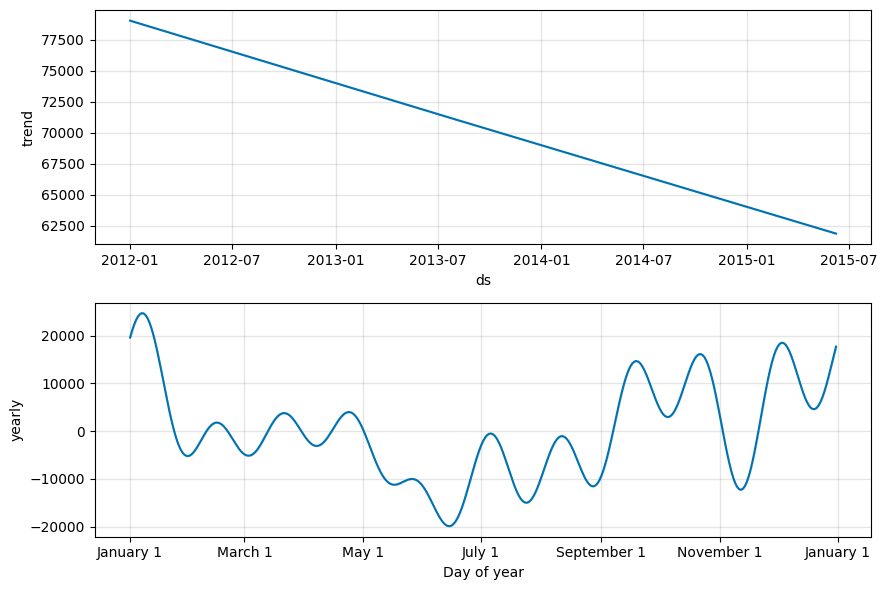

In [17]:
fig = model.plot_components(forecast)
plt.show()

C:\Users\deven\AppData\Local\Temp\ipykernel_17772\1337605968.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


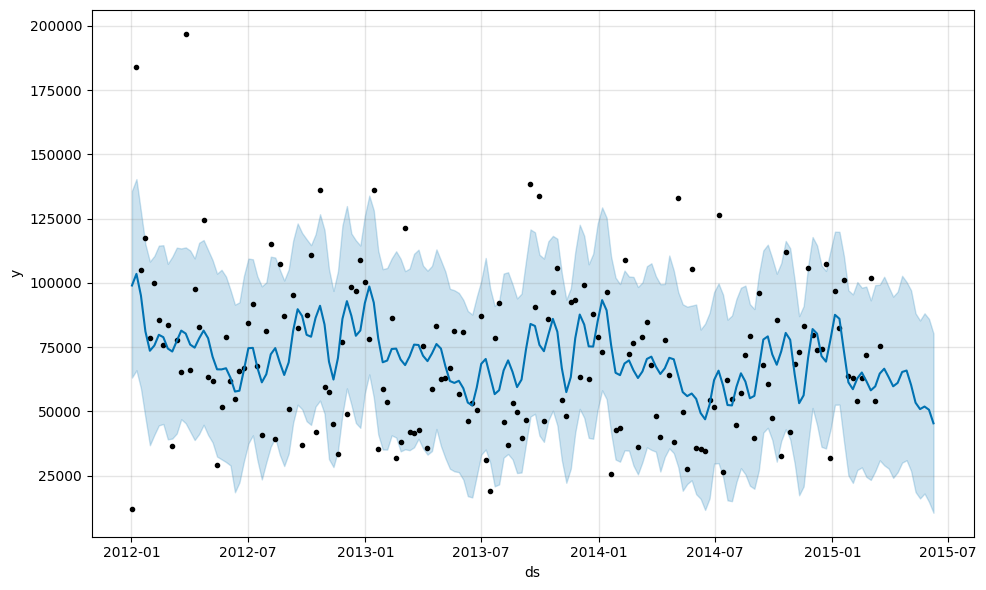

In [19]:
fig = model.plot(forecast)
fig.show()

